Importing libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Loading the data

In [6]:
data = pd.read_csv("/content/fraud.csv")

In [7]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [4]:
df.shape

(260509, 11)

Data Exploration

In [9]:
# missing values
print(data.isnull().sum())



step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


In [14]:
data.dropna(subset = ['oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud'],inplace = True)

Imbalanced data

In [16]:
print(data['isFraud'].value_counts())

isFraud
0.0    981210
1.0       519
Name: count, dtype: int64


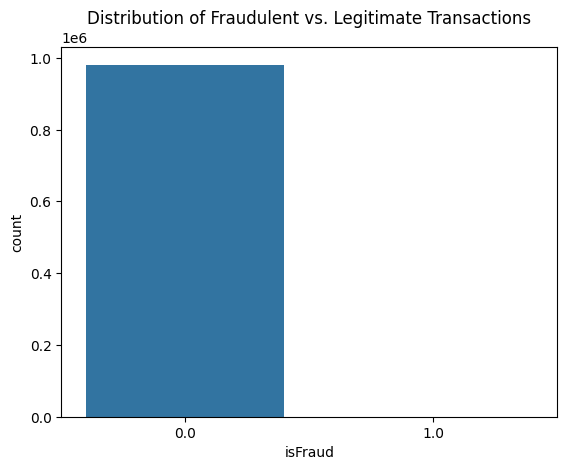

In [15]:


sns.countplot(x='isFraud', data=data)
plt.title('Distribution of Fraudulent vs. Legitimate Transactions')
plt.show()


Feature engineering - taking relevant columns only

In [17]:
data = data.drop(['step', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)

#encoding
data = pd.get_dummies(data, columns=['type'], drop_first=True)

Data preprocessing

In [20]:

X = data.drop('isFraud', axis=1)
y = data['isFraud']




Handling imbalanced dataset

In [19]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample the data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after resampling
print(pd.Series(y_resampled).value_counts())


isFraud
0.0    981210
1.0    981210
Name: count, dtype: int64


In [21]:

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_preds = lr_model.predict(X_test)


In [23]:

# Evaluate the model
print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_preds))
print("Classification Report:\n", classification_report(y_test, lr_preds))

Logistic Regression Model:
Accuracy: 0.9277397295176364
Confusion Matrix:
 [[178163  17833]
 [ 10528 185960]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.91      0.93    195996
         1.0       0.91      0.95      0.93    196488

    accuracy                           0.93    392484
   macro avg       0.93      0.93      0.93    392484
weighted avg       0.93      0.93      0.93    392484

